<a href="https://colab.research.google.com/github/nirvanareis/estatistica-python/blob/main/Analise_predicao_pandas_Desenvolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**2º Projeto Prático - Dados  |  Desenvolve 2024**
##**Análise de Dados e Predição com Python e Pandas**


 **Aluna:** Nirvana Reis | Turma 6

 **Desafio:** Realizar uma análise completa usando Python e a biblioteca Pandas numa base de dados de preços de aluguéis em São Paulo.

 **Etapas:**

* Obter base de dados.
* Importar os dados para um DataFrame do Pandas, limpar os dados e tratar valores ausentes;
* Realizar uma análise descritiva dos dados, calculando estatísticas básicas e identificando tendências;
* Ajustar um modelo de regressão linear aos dados para tentar prever o preço do aluguel em uma determinada área;
*Criar visualizações gráficas usando bibliotecas como Matplotlib ou Seaborn para representar os dados;
* Tirar conclusões a partir das análises realizadas e apresentar os resultados em um relatório.



---






> **Importação de bibliotecas e carregamento dos dados:**





In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette("Accent")

import matplotlib.pyplot as plt

In [40]:
base = 'base-alugueis-sp.csv'

In [41]:
dados = pd.read_csv(base)
dados.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


> **Características gerais da base de dados:**





In [42]:
dados.shape                           #quantidade de linhas e colunas do dataframe

(11657, 8)

In [43]:
dados.columns                         #cabelhos das colunas da tabela

Index(['address', 'district', 'area', 'bedrooms', 'garage', 'type', 'rent',
       'total'],
      dtype='object')

In [44]:
dados.columns = ['Endereco', 'Distrito', 'Area', 'Quartos', 'Garagem', 'Tipo', 'Aluguel', 'Total']
dados.head()                          #alteração dos cabeçalhos das colunas

,Endereco,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,Total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [45]:
dados.info()                            #informações gerais sobre o dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Endereco  11657 non-null  object
 1   Distrito  11657 non-null  object
 2   Area      11657 non-null  int64 
 3   Quartos   11657 non-null  int64 
 4   Garagem   11657 non-null  int64 
 5   Tipo      11657 non-null  object
 6   Aluguel   11657 non-null  int64 
 7   Total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [46]:
dados.duplicated().sum()                    #verificação de dados duplicados

0

In [47]:
dados.isna().sum()                           #verificação de dados nulos

Endereco    0
Distrito    0
Area        0
Quartos     0
Garagem     0
Tipo        0
Aluguel     0
Total       0
dtype: int64

> **Identificação das variáveis:**

Variáveis Qualitativas Nominais



In [48]:
dados['Tipo'].unique()

array(['Studio e kitnet', 'Apartamento', 'Casa em condomínio', 'Casa'],
      dtype=object)

In [49]:
dados['Distrito'].unique()

array(['Belenzinho', 'Vila Marieta', 'Pinheiros', ..., 'Vila Elvira',
       'Jardim Vitoria Regia', 'Retiro Morumbi'], dtype=object)

In [50]:
dados['Endereco'].unique()

array(['Rua Herval', 'Avenida São Miguel', 'Rua Oscar Freire', ...,
       'Avenida Doutor Alberto de Oliveira Lima', 'São José',
       'Rua Abílio Borin'], dtype=object)

Variáveis Quantitativas Discretas

In [51]:
dados['Garagem'].unique()

array([0, 1, 2, 3, 5, 4, 6])

In [52]:
sorted(dados['Quartos'].unique())

[0, 1, 2, 3, 4, 5, 6]

Variáveis Quantitativas Contínuas

In [53]:
print('Alugueis de %s até %s reais'% (dados['Aluguel'].min(), dados['Aluguel'].max()))

Alugueis de 500 até 25000 reais


In [54]:
print('Custo total de de %s até %s reais'% (dados['Total'].min(), dados['Total'].max()))

Custo total de de 509 até 28700 reais


In [55]:
print('Áreas de %s até %s metros quadrados'% (dados['Area'].min(), dados['Area'].max()))   #Identificação de dados de área igual a zero

Áreas de 0 até 580 metros quadrados


---
Considerando que não existe imóvel de área igual a zero, será necessário fazer um tratamento neste dataset.

No Brasil, a Lei nº 11.888/08, que trata da assistência técnica pública e gratuita para projeto e construção de habitação de interesse social, estipula que a área mínima para uma unidade habitacional pode ser de 25 metros quadrados (m²).

Em São Paulo, a legislação municipal e estadual não estabelece uma área mínima específica para imóveis do tipo studio ou kitnet. Embora não haja uma área mínima legalmente definida especificamente em São Paulo, práticas comuns do mercado imobiliário indicam que áreas a partir de 18 m² são consideradas aceitáveis.

Portanto, serão identificados e retirados da base de dados os imóveis com área abaixo deste valor.

In [56]:
(dados['Area'] < 18).sum()                     #quantidade de imóveis com área menor que 18m²

86

In [57]:
dados[dados['Area'] < 18]                       #observação desses dados

,Endereco,Distrito,Area,Quartos,Garagem,Tipo,Aluguel,Total
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
44,Rua das Palmeiras,Vila Buarque,11,1,0,Studio e kitnet,1560,1904
59,Rua Elísio de Carvalho,Vila São Luís(zona Oeste),12,1,0,Apartamento,1122,1208
81,Rua Hermínio Lemos,Cambuci,15,1,0,Studio e kitnet,1150,1194
118,Rua Speers,Vila Sao Pedro,15,1,0,Studio e kitnet,950,1487
...,...,...,...,...,...,...,...,...
10467,Rua Sarandira,Jaguaré,12,1,0,Casa,1070,1181
10566,Rua Renato,Vila Ré,12,1,0,Studio e kitnet,950,987
10707,Rua Carlos Escobar,Santana,12,1,0,Studio e kitnet,900,935
10819,Avenida Imirim,Imirim,17,1,0,Apartamento,900,1102


In [58]:
idx = dados[dados['Area'] < 18].index
idx

Index([    1,    44,    59,    81,   118,   141,   188,   226,   229,   271,
         301,   307,   478,   481,   595,   639,   755,   765,   857,   962,
        1005,  1171,  1223,  1304,  1600,  1634,  2213,  2219,  2431,  2490,
        2579,  2601,  2610,  2636,  2983,  3018,  3141,  3359,  3403,  3480,
        3527,  3529,  3533,  3549,  3781,  3841,  3878,  3949,  3977,  4270,
        4625,  4683,  4735,  4849,  5129,  5323,  5532,  5588,  5892,  5916,
        5959,  6581,  6596,  6780,  7039,  7085,  7229,  7241,  7582,  7952,
        8204,  8215,  8470,  8617,  8856,  9089,  9090,  9265,  9288,  9502,
        9898, 10467, 10566, 10707, 10819, 11055],
      dtype='int64')

In [59]:
dados.drop(index = idx, inplace = True)

In [60]:
(dados['Area'] < 18).sum()                               #check

0

---

> **Estatísticas descritivas das variáveis:**

In [61]:
dados.describe().round(2)                                #descrição geral dos dados

,Area,Quartos,Garagem,Aluguel,Total
count,11571.00,11571.00,11571.00,11571.00,11571.00
mean,85.19,1.97,1.07,3262.11,4095.40
std,74.04,0.93,1.13,2651.86,3354.85
min,18.00,0.00,0.00,500.00,509.00
25%,41.00,1.00,0.00,1600.00,2008.00
50%,60.00,2.00,1.00,2430.00,3070.00
75%,97.00,3.00,2.00,3809.50,4796.00
max,580.00,6.00,6.00,25000.00,28700.00


Text(0, 0.5, 'Contagem')

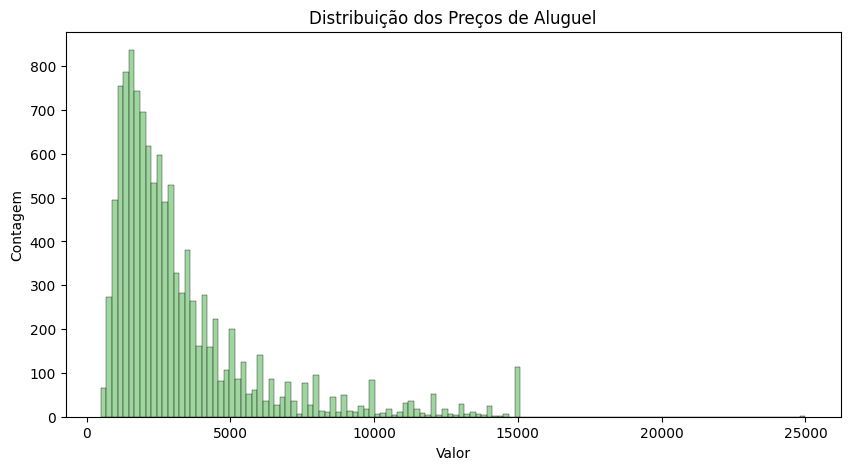

In [62]:
ax = sns.histplot(dados['Aluguel'], kde = False)
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição dos Preços de Aluguel', fontsize = 12)
ax.set_xlabel('Valor', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)

Text(0, 0.5, 'Contagem')

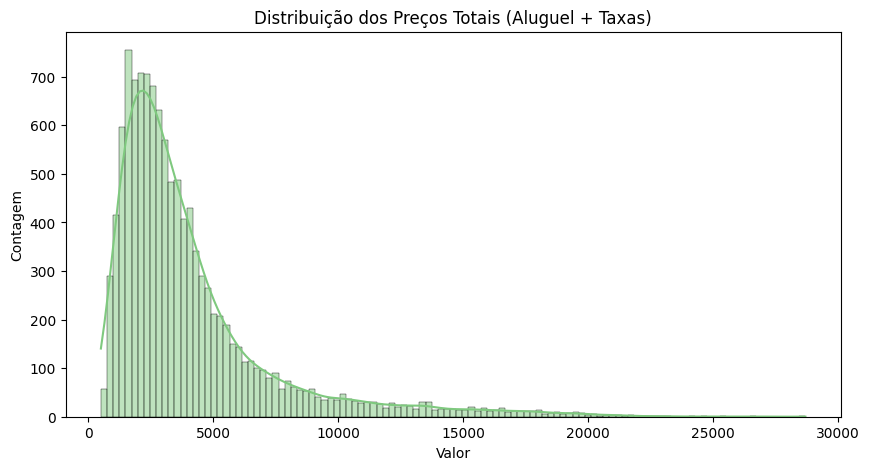

In [63]:
ax = sns.histplot(dados['Total'], kde=True)
ax.set_title('Distribuição dos Preços Totais (Aluguel + Taxas)')
ax.figure.set_size_inches(10,5)
ax.set_xlabel('Valor', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)

Text(0, 0.5, 'Contagem')

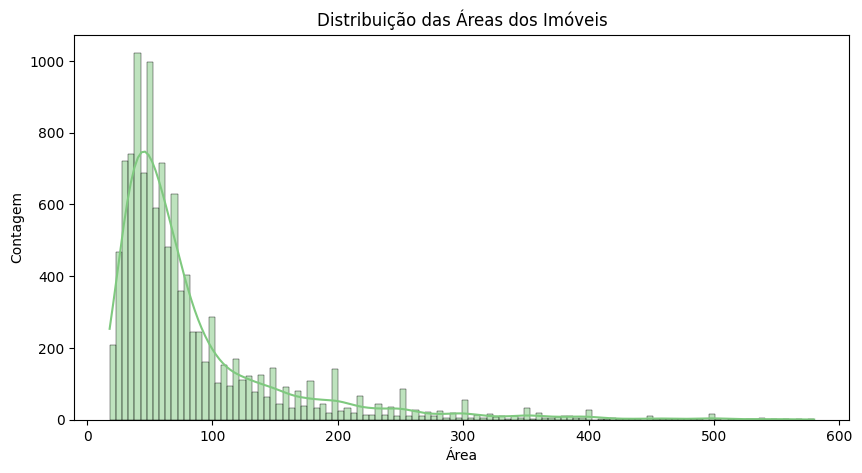

In [64]:
ax = sns.histplot(dados['Area'], kde=True)
ax.set_title('Distribuição das Áreas dos Imóveis')
ax.figure.set_size_inches(10,5)
ax.set_xlabel('Área', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)

Text(0, 0.5, 'Contagem')

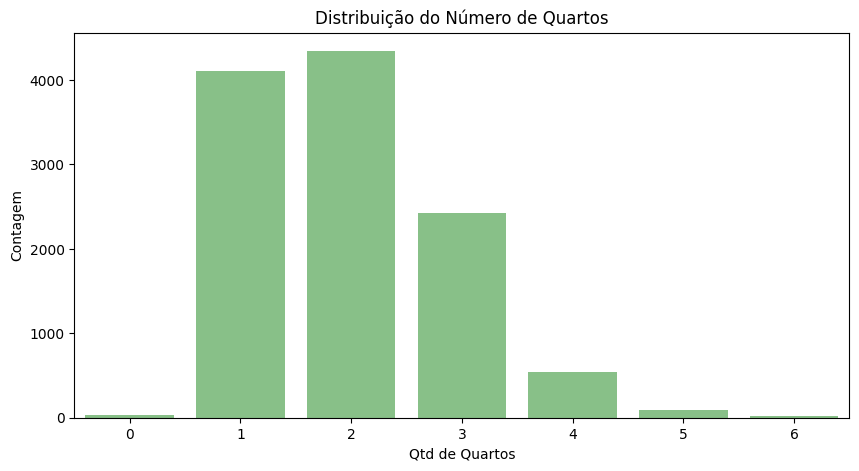

In [65]:
ax = sns.countplot(x='Quartos', data=dados)
ax.set_title('Distribuição do Número de Quartos')
ax.figure.set_size_inches(10,5)
ax.set_xlabel('Qtd de Quartos', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)

Text(0, 0.5, 'Contagem')

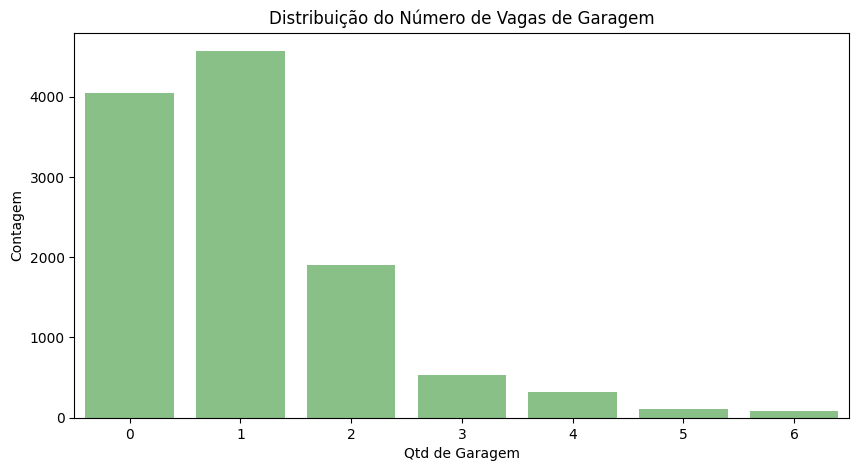

In [66]:
ax =sns.countplot(x='Garagem', data=dados)
ax.set_title('Distribuição do Número de Vagas de Garagem')
ax.figure.set_size_inches(10,5)
ax.set_xlabel('Qtd de Garagem', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)

In [67]:
dados.groupby('Tipo').mean(numeric_only=True).round(2)    #média dos dados numéricos agrupados por tipo

,Area,Quartos,Garagem,Aluguel,Total
Tipo,,,,,
Apartamento,73.45,1.99,1.02,3359.13,4439.28
Casa,136.80,2.36,1.52,3479.74,3833.34
Casa em condomínio,120.34,2.23,1.41,3906.38,4563.15
Studio e kitnet,32.46,1.01,0.27,2157.73,2708.91


In [68]:
frequencia = dados['Tipo'].value_counts()
percentual = (dados['Tipo'].value_counts(normalize=True) * 100).round(2)
dist_tipo = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_tipo

,Frequência,Porcentagem (%)
Tipo,,
Apartamento,7179,62.04
Casa,2826,24.42
Studio e kitnet,1327,11.47
Casa em condomínio,239,2.07


> **Análise da distribuição de dados de Aluguel e sua correlação com os demais dados:**

In [69]:
moda_total = dados['Aluguel'].mode().round(2)
moda_total

0    3000
Name: Aluguel, dtype: int64

In [70]:
mediana_total = dados['Aluguel'].median().round(2)
mediana_total

2430.0

In [71]:
media_total = dados['Aluguel'].mean().round(2)
media_total

3262.11

In [72]:
quartis = dados['Aluguel'].quantile([0.25, 0.5, 0.75])
quartis

0.25    1600.0
0.50    2430.0
0.75    3809.5
Name: Aluguel, dtype: float64

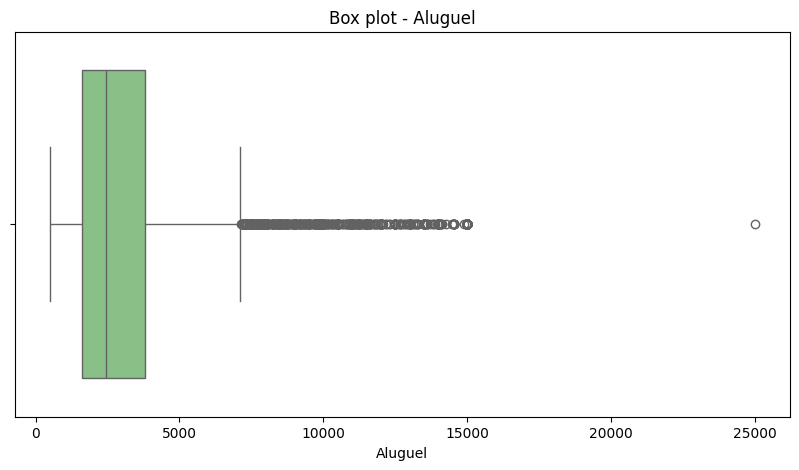

In [73]:
ax = sns.boxplot(x = 'Aluguel', data = dados, orient = 'h')
ax.set_title('Box plot - Aluguel', fontsize = 12)
ax.figure.set_size_inches(10,5)

---
O gráfico de box plot demonstra a assimetria dos dados e mostra um outlier que pode afetar a performance e a precisão do modelo, tratando-se de uma única observação, muito acima das demais informações do conjunto de dados. Sendo este o único ponto de divergência acentuada, o mesmo será identificado e removido do dataset para melhor eficiência do modelo a ser criado.

In [74]:
dados['Aluguel'].max()

25000

In [75]:
max = dados['Aluguel'].idxmax()
max

6095

In [76]:
dados = dados.drop(max)

In [77]:
print(dados['Aluguel'].describe().round(2))             #check

count    11570.00
mean      3260.23
std       2644.27
min        500.00
25%       1600.00
50%       2430.00
75%       3808.75
max      15000.00
Name: Aluguel, dtype: float64


---

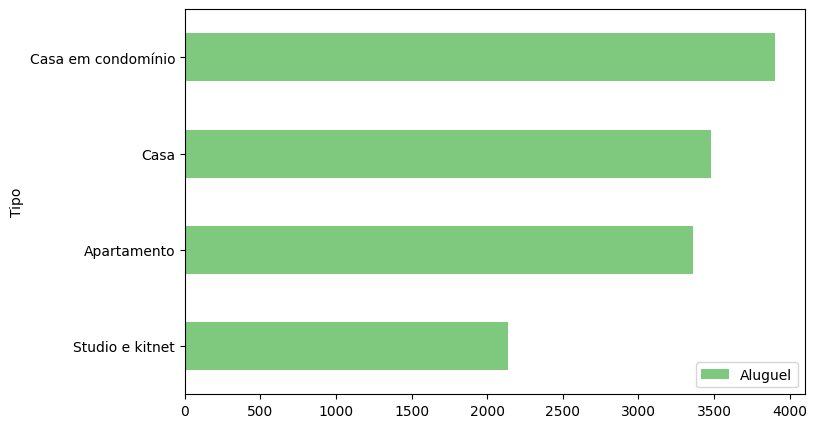

In [78]:
df_precotipo = dados.groupby('Tipo')[['Aluguel']].mean().sort_values('Aluguel')
df_precotipo.plot(kind='barh', figsize = (8,5));

Text(0.5, 1.05, 'Dispersão entre as variáveis em relação ao Aluguel')

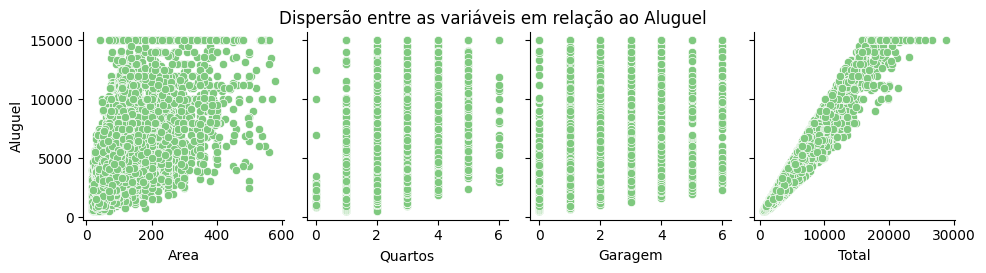

In [79]:
ax = sns.pairplot(dados, y_vars='Aluguel', x_vars = ['Area', 'Quartos', 'Garagem', 'Total'])
ax.fig.suptitle('Dispersão entre as variáveis em relação ao Aluguel', y = 1.05)

In [80]:
dados.corr(numeric_only= True).round(4)

,Area,Quartos,Garagem,Aluguel,Total
Area,1.0000,0.7267,0.7327,0.6702,0.6538
Quartos,0.7267,1.0000,0.6548,0.5325,0.5261
Garagem,0.7327,0.6548,1.0000,0.6188,0.6185
Aluguel,0.6702,0.5325,0.6188,1.0000,0.9780
Total,0.6538,0.5261,0.6185,0.9780,1.0000


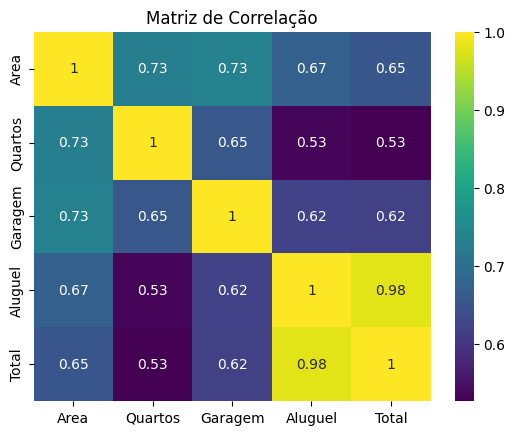

In [81]:
sns.heatmap(dados[['Area', 'Quartos', 'Garagem', 'Aluguel', 'Total']].corr(), annot=True,  cmap='viridis')
plt.title('Matriz de Correlação')
plt.show()

Considerando a alta correlação entre os dados de Aluguel e de Total encontrados nas análises (maior do que 0.8), essas duas variáveis não devem estar presentes no modelo, afim de evitar uma multicolinearidade, que pode comprometer a validade dos resultados. Desta forma, a construção do modelo será realizada com os dados de Aluguel, sendo esta a variável dependente da regressão.



> **Manipulação dos dados qualitativos para criação do modelo:**

In [82]:
Tipo_ajustado = pd.get_dummies(dados['Tipo'], dtype=int)

In [83]:
dados = pd.concat([dados, Tipo_ajustado], axis =1)

In [84]:
dados.drop(columns=['Tipo'], inplace=True)
dados.head()

,Endereco,Distrito,Area,Quartos,Garagem,Aluguel,Total,Apartamento,Casa,Casa em condomínio,Studio e kitnet
0,Rua Herval,Belenzinho,21,1,0,2400,2939,0,0,0,1
2,Rua Oscar Freire,Pinheiros,18,1,0,4000,4661,1,0,0,0
3,Rua Júlio Sayago,Vila Ré,56,2,2,1750,1954,0,0,1,0
4,Rua Barata Ribeiro,Bela Vista,19,1,0,4000,4654,0,0,0,1
5,Rua Domingos Paiva,Brás,50,2,1,3800,4587,1,0,0,0


In [85]:
dados['Distrito'].nunique()

1195

Baseados nas informações oficiais da Prefeitura de São Paulo, a divisão administrativa da cidade registra 96 distritos agrupados em 32 subprefeituras. O dataset informa a existencia de 1195 distritos distintos na base de dados, um valor muito acima do real o que sugere inconsistência nesse conjunto de dados. Desta forma os dados de localização não serão inseridas no modelo afim de garantir a veracidade das previsões.

> **Manipulação dos dados quantitativos para criação do modelo:**

A partir das análises descritivas realizadas anteriormente foi possível observar uma assimetria à direita dos dados nas distribuições, o que ocorre quando a maioria dos valores está concentrada à esquerda da média, e a cauda da distribuição se estende para a direita. Isso significa que existem alguns valores significativamente maiores que a maioria dos dados.


<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>



Esse efeito pode causar problemas em modelos de regressão, levar a resultados de modelo imprecisos e influenciar os coeficientes estimados do modelo, tornando-os menos confiáveis e difíceis de interpretar. Uma das técnicas mais comuns para lidar com dados assimétricos à direita é a transformação logarítmica.  Essa transformação pode reduzir a assimetria, tornando a distribuição dos dados mais próxima da normalidade, e será aplicada aos dados quantitativos do Dataset.

In [86]:
dados['log_aluguel'] = np.log(dados['Aluguel'])
dados['log_area'] = np.log(dados['Area'])
dados['log_quartos'] = np.log(dados['Quartos']+1)
dados['log_garagem'] = np.log(dados['Garagem'] + 1)

In [87]:
dados.head()

,Endereco,Distrito,Area,Quartos,Garagem,Aluguel,Total,Apartamento,Casa,Casa em condomínio,Studio e kitnet,log_aluguel,log_area,log_quartos,log_garagem
0,Rua Herval,Belenzinho,21,1,0,2400,2939,0,0,0,1,7.783224,3.044522,0.693147,0.000000
2,Rua Oscar Freire,Pinheiros,18,1,0,4000,4661,1,0,0,0,8.294050,2.890372,0.693147,0.000000
3,Rua Júlio Sayago,Vila Ré,56,2,2,1750,1954,0,0,1,0,7.467371,4.025352,1.098612,1.098612
4,Rua Barata Ribeiro,Bela Vista,19,1,0,4000,4654,0,0,0,1,8.294050,2.944439,0.693147,0.000000
5,Rua Domingos Paiva,Brás,50,2,1,3800,4587,1,0,0,0,8.242756,3.912023,1.098612,0.693147


<Axes: xlabel='log_aluguel', ylabel='Count'>

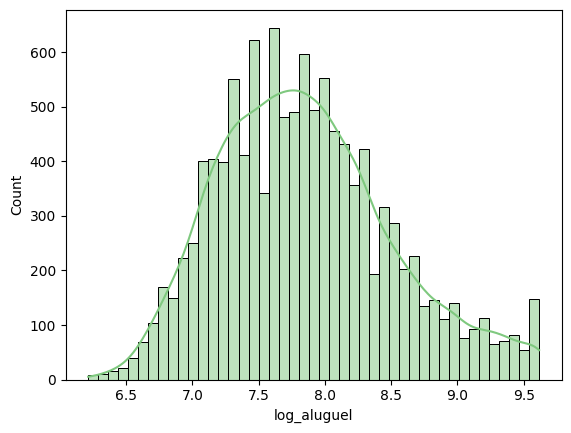

In [88]:
ax = sns.histplot(dados['log_aluguel'], kde = True)   #check da distribuição de dados normalizada do Aluguel
ax

Text(0.5, 1.05, 'Dispersão entre as variáveis em relação ao Aluguel')

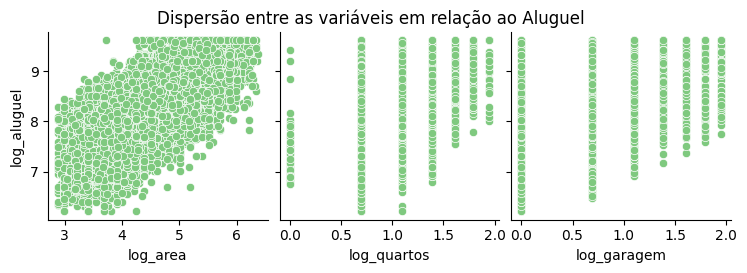

In [89]:
ax = sns.pairplot(dados, y_vars='log_aluguel', x_vars = ['log_area', 'log_quartos', 'log_garagem'])
ax.fig.suptitle('Dispersão entre as variáveis em relação ao Aluguel', y = 1.05)

> **Construção do modelo de regressão:**

In [90]:
import statsmodels.api as sm

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
y = dados['log_aluguel']
X = dados[['log_area', 'log_quartos', 'log_garagem', 'Apartamento',	'Casa',	'Casa em condomínio',	'Studio e kitnet']]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2811)

In [94]:
X_train_constante = sm.add_constant(X_train)
X_train_constante

,const,log_area,log_quartos,log_garagem,Apartamento,Casa,Casa em condomínio,Studio e kitnet
1323,1.0,3.713572,1.098612,0.000000,1,0,0,0
1018,1.0,4.127134,1.098612,1.098612,1,0,0,0
8270,1.0,4.317488,1.386294,1.098612,1,0,0,0
6533,1.0,4.248495,1.098612,0.000000,1,0,0,0
27,1.0,3.218876,0.693147,0.000000,0,0,0,1
...,...,...,...,...,...,...,...,...
6936,1.0,3.806662,0.693147,1.098612,0,0,0,1
10665,1.0,4.382027,1.098612,0.693147,0,1,0,0
7217,1.0,4.143135,1.098612,0.693147,1,0,0,0
8714,1.0,5.723585,1.945910,1.386294,0,1,0,0


In [95]:
modelo_statsmodel = sm.OLS(y_train,X_train_constante, hasconst = True).fit()

In [96]:
print(modelo_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:            log_aluguel   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     2068.
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:29:24   Log-Likelihood:                -5351.1
No. Observations:                9256   AIC:                         1.072e+04
Df Residuals:                    9249   BIC:                         1.077e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.0160      0

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [98]:
modelo = LinearRegression ()  #criação do modelo

In [99]:
modelo.fit(X_train, y_train)  #treinamento do modelo

LinearRegression()

In [100]:
print("R² = {}" .format(modelo.score(X_train, y_train).round(3)))   #r2 do modelo

R² = 0.573


In [101]:
y_previsto = modelo.predict(X_test)   #previsao do modelo com as variaveis de teste

In [102]:
print("R² = %s" % metrics.r2_score(y_test, y_previsto).round(3))  #coeficiente para as previsões do modelo

R² = 0.582


>**Previsão pontual:**

In [103]:
entrada = X_test[0:1]   #simulação de dados de um imóvel
entrada

,log_area,log_quartos,log_garagem,Apartamento,Casa,Casa em condomínio,Studio e kitnet
2433,4.234107,1.386294,1.098612,1,0,0,0


In [104]:
modelo.predict(entrada)[0].round(2)  #retorno do valor médio Total segundo o modelo, considerando a entrada gerada acima

8.12

In [105]:
np.exp(modelo.predict(entrada)[0].round(2))

3361.0207450799394

In [106]:
y_previsto_train = modelo.predict(X_train)

<Axes: title={'center': 'Previsão x Real'}, xlabel='log do preço - Previsão', ylabel='log do preço - Real'>

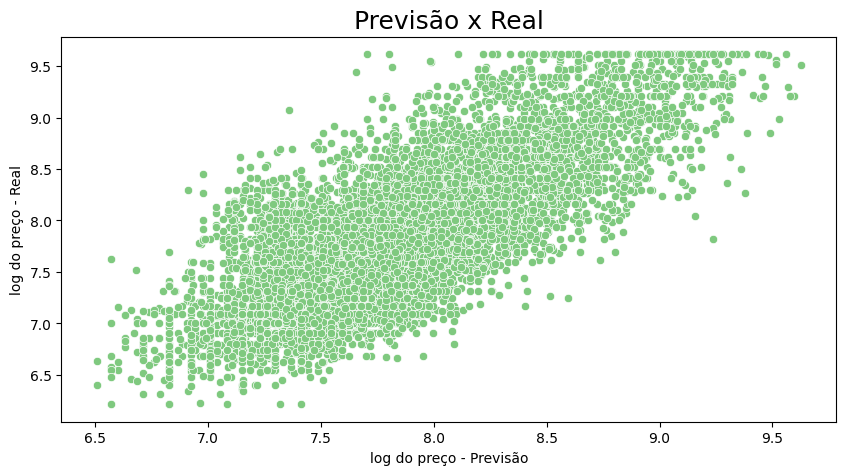

In [107]:
ax = sns.scatterplot(x=y_previsto_train, y = y_train)
ax.figure.set_size_inches(10,5)
ax.set_title('Previsão x Real', fontsize = 18)
ax.set_xlabel('log do preço - Previsão', fontsize = 10)
ax.set_ylabel('log do preço - Real', fontsize = 10)
ax

> **Simulador simples do aluguel:**

In [108]:
area = 85                      #Simulação de aluguel para apartamento de 85m² com 3 quartos e gararagem.
quartos = 3
garagem = 1
Apartamento = 1
Casa = 0
condominio = 0
Studio = 0
entrada= [[np.log(area), np.log(quartos + 1), np.log(garagem + 1), Apartamento,	Casa,	condominio,	Studio]]

print('R${0:.2f} de Aluguel.'.format(np.exp(modelo.predict(entrada)[0])))

R$3264.36 de Aluguel.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [109]:
residuo = y_train - y_previsto_train

<Axes: title={'center': 'Distribuição de frequência dos Resíduos'}, xlabel='log do Preço', ylabel='Count'>

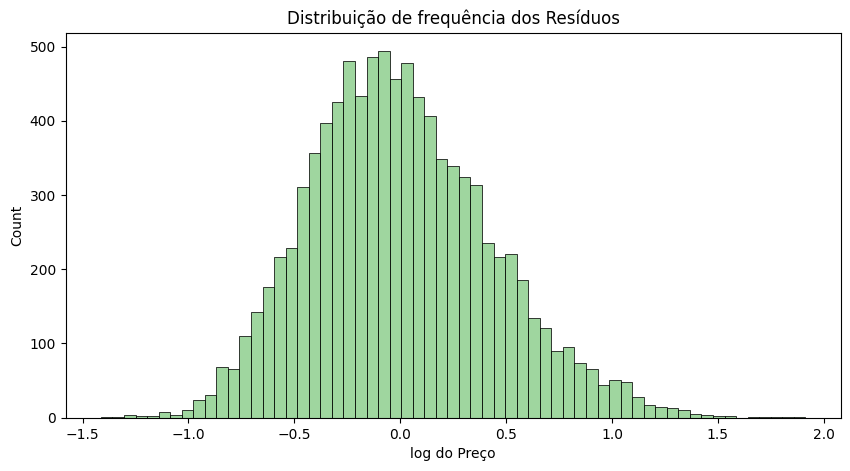

In [110]:
ax = sns.histplot(residuo)
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de frequência dos Resíduos', fontsize = 12)
ax.set_xlabel('log do Preço', fontsize = 10)
ax

A aproximação dos resíduos a uma distribuição normal sugere que as suposições do modelo de regressão linear estão sendo atendidas.

### **Interpretação dos resultados**

> **Descrição dos dados:**

* Área: Variável contínua com uma média de 85.19 e desvio padrão de 74.04, variando de 18 a 580.
* Quartos: Variável discreta com uma média de 1.97 e desvio padrão de 0.93, variando de 0 a 6.
* Garagem: Variável discreta com uma média de 1.07 e desvio padrão de 1.13, variando de 0 a 6.
* Aluguel: Variável contínua com uma média de 3262.11 e desvio padrão de 2651.86, variando de 500 a 25000.
* Total: Variável contínua com uma média de 4095.40 e desvio padrão de 3354.85, variando de 509 a 28700.

> **Distribuição dos tipos de imóveis:**

* Apartamento: 62.05%
* Casa: 24.43%
* Studio e kitnet: 11.46%
* Casa em condomínio: 2.07%


> **Correlação entre os dados:**

* Área, Quartos, Garagem: Forte correlação positiva entre si, indicando que imóveis com maior área tendem a ter mais quartos e vagas de garagem.
* Aluguel e Total: Fortemente correlacionados (0.9780), indicando que o total inclui o valor do aluguel.
* Área e Aluguel: Correlação de 0.6702, sugerindo que imóveis maiores tendem a ter aluguéis mais altos.
* Quartos e Aluguel: Correlação de 0.5325, indicando que mais quartos geralmente se associam a aluguéis mais altos.
* Garagem e Aluguel: Correlação de 0.6188, indicando que imóveis com mais vagas de garagem tendem a ter aluguéis mais altos.

> **Modelo de regressão:**

R-quadrado (0.573): O modelo explica aproximadamente 57.3% da variabilidade nos dados de aluguel, o que é um bom ajuste, mas indica que há outros fatores que podem influenciar o aluguel não capturados pelo modelo.



> **Conclusão:**

Considerando a inconsistência dos dados de localidade, não foi possível construir um modelo de regressão para prever o preço do aluguel em uma determinada área, contudo o modelo criado permite identificar que:


*   Imóveis com maior área e com mais vagas de garagem têm aluguéis mais altos.
*   Os tipos de imóveis tem um impacto significativo no valor do aluguel.
*   A alta correlação entre o 'Aluguel' e o 'Total' sugere que a variável 'Total' é altamente influenciada pelo preço do aluguel
*  Apenas 25% dos valores dos imóveis do dataset estão acima de R$3.809,50, existindo maior concentração de alugueis abaixo deste valor.


> **Considerações:**


* Adquirir mais dados pode ajudar a refinar o modelo e confirmar os resultados.
* O ajuste dos dados de localização através da correção da variável 'Distritos' ou agregação de dados como subprefeituras ou zonas da cidade, resultariam em um modelo com mais informação e precisão.
